In [ ]:
import os
import sys
import socket


import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
# Visualize the result
plt.style.use("bmh")
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,"  , len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs
DICT LIST


In [ ]:
data_loc = "open_labeled_data"

with open(f"{data_loc}labeled_data/image_results_filip_500.json", "r") as f:
    data = json.load(f)["data"]["image_results"]
labeled_data = pd.json_normalize(data)

filtered_data = labeled_data[labeled_data["user_id"] == "Filip_500_profession_metorology-position_phd-1736256271078"]


In [ ]:
# model_run_name = ice01_l95_z50_ps128_band31
beta = 1/1.75#0.57#0.5#1.5
n_Ks = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
F1_best = 0
F1beta_best = 0
MCC_best = 0
TP_high = 0
acc_best = 0
all_scores = []
TP = 0
FP = 0
TN = 0
FN = 0
labels = ""
thr=""
acc = 0
F1 = 0
F1beta = 0
MCC = 0

for n_K in n_Ks:
    folder = f"location_of_saved_scores/K{n_K}/scores/"
    for file in os.listdir(folder):
        if "band29" not in file  and "full_record_500" in file and "full_record_500_" not in file and "full_record_5000" not in file and "6filters" not in file and "res64" in file:# and "thr5" not in file and "thr2" not in file:
            band = (file.split("ps128_")[1].split("_filter128")[0])
            # if band == "band29":
            thr = file.split("thr")[1].split("_")[0]
            labels = (file.split("labels_")[-1].split(".")[0])
            score_file = np.load(folder + file, allow_pickle=True).item()
            
            points = np.sum(score_file["tot_points"])
            TP = np.sum(score_file["area_true_positive_scores"]) #/ points
            FP = np.sum(score_file["area_false_positive_scores"]) #/ points
            TN = np.sum(score_file["area_true_negative_scores"]) #/ points
            FN = np.sum(score_file["area_false_negative_scores"]) #/ points
            precission = TP / (TP + FP)
            acc = TP + TN
            TPR = TP / (TP + FN)
            FNR =  FN / (FN + TP)
            TNR =  TN / (TN + FP)
            FPR =  FP / (FP + TN)
            MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

            F1 =   2 * (TPR * precission) / (precission + TPR)
            F1beta = (1 + beta*beta) * (TPR * precission) / (precission*beta**2 + TPR)
            if TP > TP_high:
                TP_high = TP
                TN_high = TN
                FP_high = FP
                FN_high = FN
                acc_high =acc

            if F1 > F1_best:
                F1_best = F1
                best_model_F1 = band + "_" + "K" + str(n_K) +  "_labels_" + labels + "_thr" + thr
                TP_best = TP 
                FP_best = FP 
                TN_best = TN 
                FN_best = FN 
                acc_bestF1 = acc

            if F1beta > F1beta_best:
                F1beta_best = F1beta
                best_model_F1beta = band + "_" + "K" + str(n_K) +  "_labels_" + labels + "_thr" + thr
                TP_best_beta = TP 
                FP_best_beta = FP 
                TN_best_beta = TN 
                FN_best_beta = FN 
                acc_best_beta = acc

            if MCC > MCC_best:
                MCC_best = MCC
                best_model_MCC = band + "_" + "K" + str(n_K) +  "_labels_" + labels + "_thr" + thr
                TP_best_MCC = TP 
                FP_best_MCC = FP 
                TN_best_MCC = TN 
                FN_best_MCC = FN 
                acc_best_MCC = acc

            if acc > acc_best:
                acc_best = acc
                best_model_acc = band + "_" + "K" + str(n_K) +  "_labels_" + labels + "_thr" + thr
                TP_best_acc = TP 
                FP_best_acc = FP 
                TN_best_acc = TN 
                FN_best_acc = FN 
                
            # print(band + "_" + "K" + str(n_K) +  "_labels_" + labels)
            # print("TP:", TP)
            # print("FP:", FP)
            # print("TN:", TN)
            # print("FN:", FN)
            # print("acc:", acc)
            # print("MCC:", MCC)
            # print()
        
        all_scores.append({
        'file': "K" + str(n_K) +  "_labels_" + labels + "_thr" + thr,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'acc': acc,
        'F1': F1,
        'F1beta': F1beta,
        'MCC': MCC
    }) 

print("BEST F1")
print(best_model_F1)
print("F1:", F1_best)
print("TP_best:", TP_best)
print("FP_best:", FP_best)
print("TN_best:", TN_best)
print("FN_best:", FN_best)
print("acc_best:", acc_bestF1)
print()
print("BEST F1 beta")

print(best_model_F1beta)
print("F1_beta:", F1beta_best)
print("TP_best_beta:", TP_best_beta)
print("FP_best_beta:", FP_best_beta)
print("TN_best_beta:", TN_best_beta)
print("FN_best_beta:", FN_best_beta)
print("acc_best_beta:", acc_best_beta)
print()


print("BEST MCC")
print(best_model_MCC)
print("MCC:", MCC_best)
print("TP_best_MCC:", TP_best_MCC)
print("FP_best_MCC:", FP_best_MCC)
print("TN_best_MCC:", TN_best_MCC)
print("FN_best_MCC:", FN_best_MCC)
print("acc_best_MCC:", acc_best_MCC)
print()
print("BEST ACC")

print(best_model_acc)
print("acc:", acc_best)
print("TP_best_acc:", TP_best_acc)
print("FP_best_acc:", FP_best_acc)
print("TN_best_acc:", TN_best_acc)
print("FN_best_acc:", FN_best_acc)


/tmp/ipykernel_2115927/2969365881.py:42: RuntimeWarning: overflow encountered in long_scalars
  MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
/tmp/ipykernel_2115927/2969365881.py:42: RuntimeWarning: invalid value encountered in sqrt
  MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


BEST F1
band31_K9_labels_7_3_8_full_record_500_thr20
F1: 0.7420484107527112
TP_best: 34657
FP_best: 13280
TN_best: 104077
FN_best: 10815
acc_best: 138734

BEST F1 beta
band31_K15_labels_1_12_10_8_full_record_500_thr20
F1_beta: 0.7470170465139373
TP_best_beta: 29278
FP_best_beta: 7865
TN_best_beta: 109492
FN_best_beta: 16194
acc_best_beta: 138770

BEST MCC
band31_K16_labels_2_13_full_record_500_thr0
MCC: 11.63368101230531
TP_best_MCC: 21068
FP_best_MCC: 4094
TN_best_MCC: 113263
FN_best_MCC: 24404
acc_best_MCC: 134331

BEST ACC
band31_K7_labels_3_6_full_record_500_thr15
acc: 139066
TP_best_acc: 32931
FP_best_acc: 11222
TN_best_acc: 106135
FN_best_acc: 12541


In [7]:
TP_caonet = TP_best_acc
FP_caonet = FP_best_acc
TN_caonet = TN_best_acc
FN_caonet = FN_best_acc

In [8]:
MCC_arr =  np.array([f["MCC"] for f in all_scores])
MCC_arr = MCC_arr / np.max(MCC_arr)

F1_arr =  np.array([f["F1beta"] for f in all_scores])
F1_arr = F1_arr / np.max(F1_arr)
tot_arr = (F1_arr + MCC_arr) / 2 
sorted_indices = np.argsort(tot_arr)[::-1]

# Sort tot_arr and all_scores using the sorted indices
tot_arr_sorted = tot_arr[sorted_indices]
all_scores_sorted = [all_scores[i] for i in sorted_indices]

# Update the variables with the sorted values
tot_arr = tot_arr_sorted
all_scores = all_scores_sorted

162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829
162829


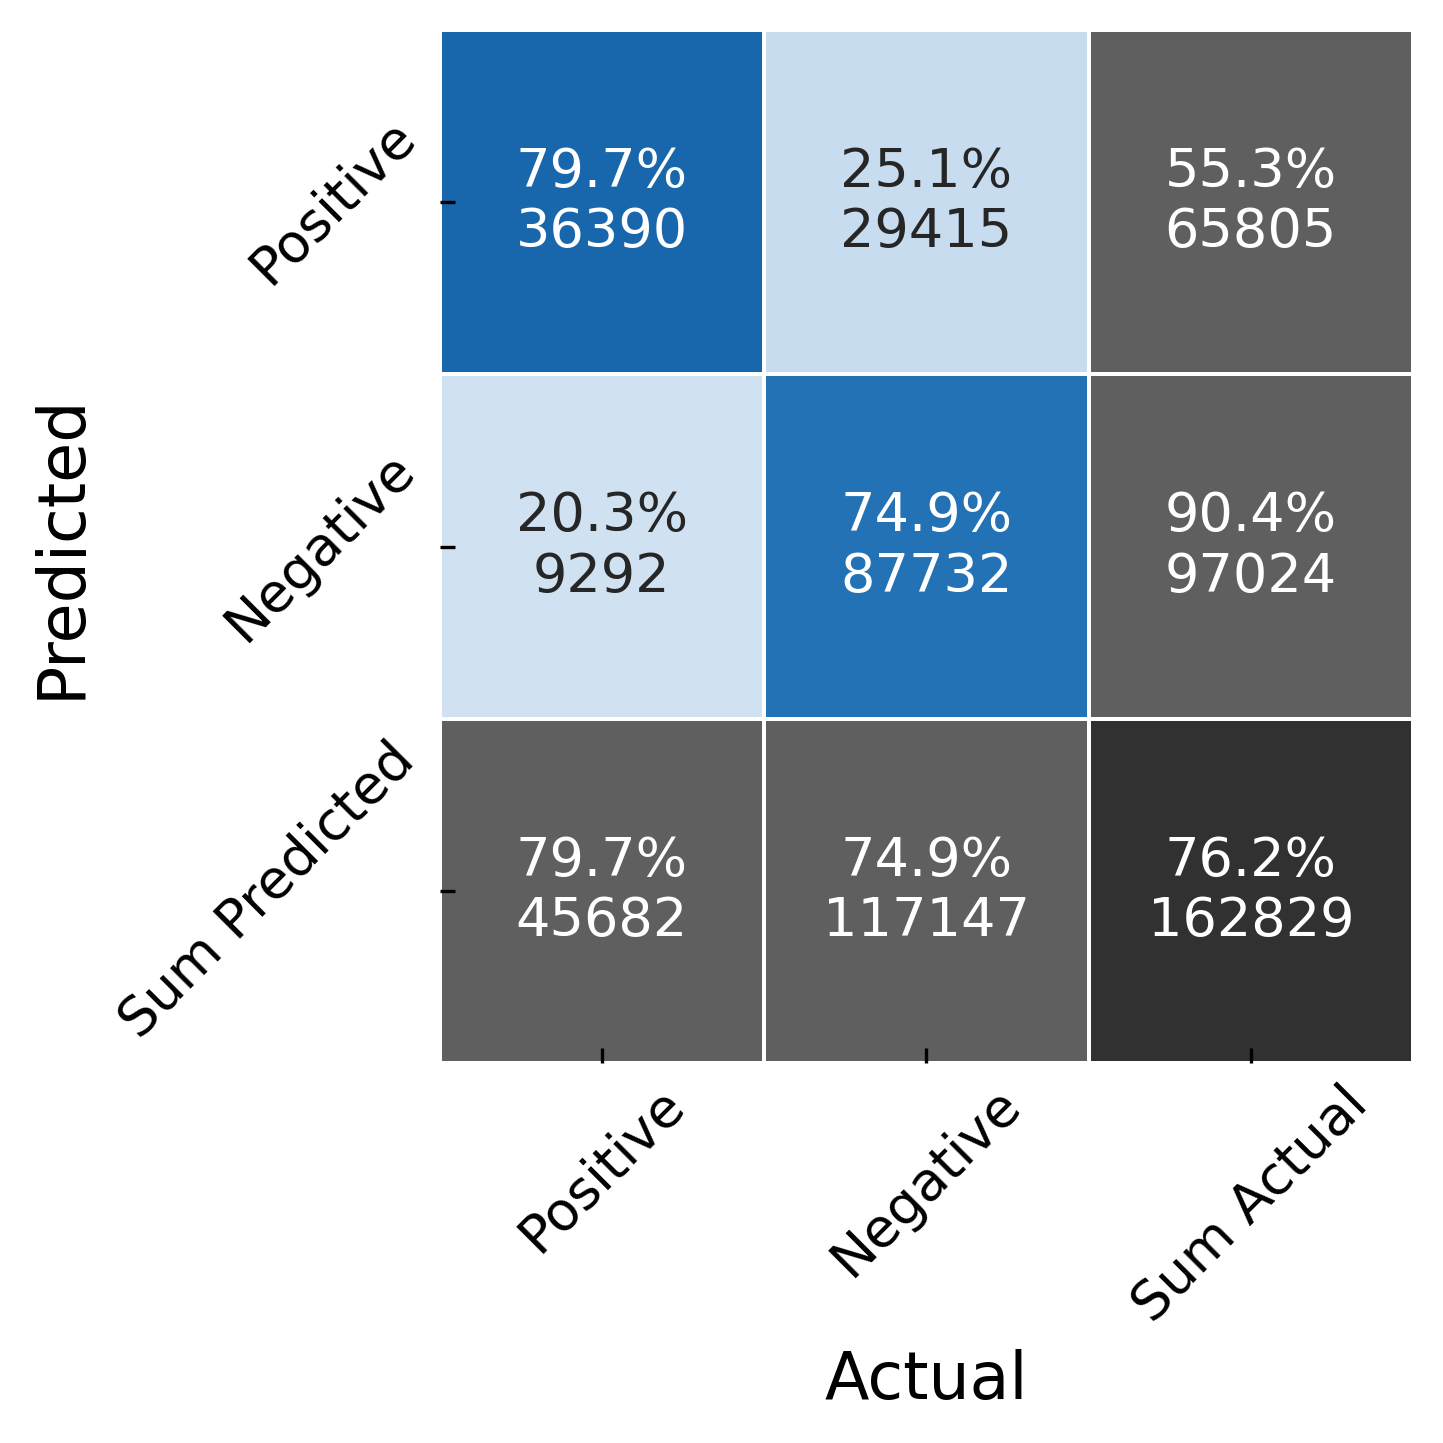

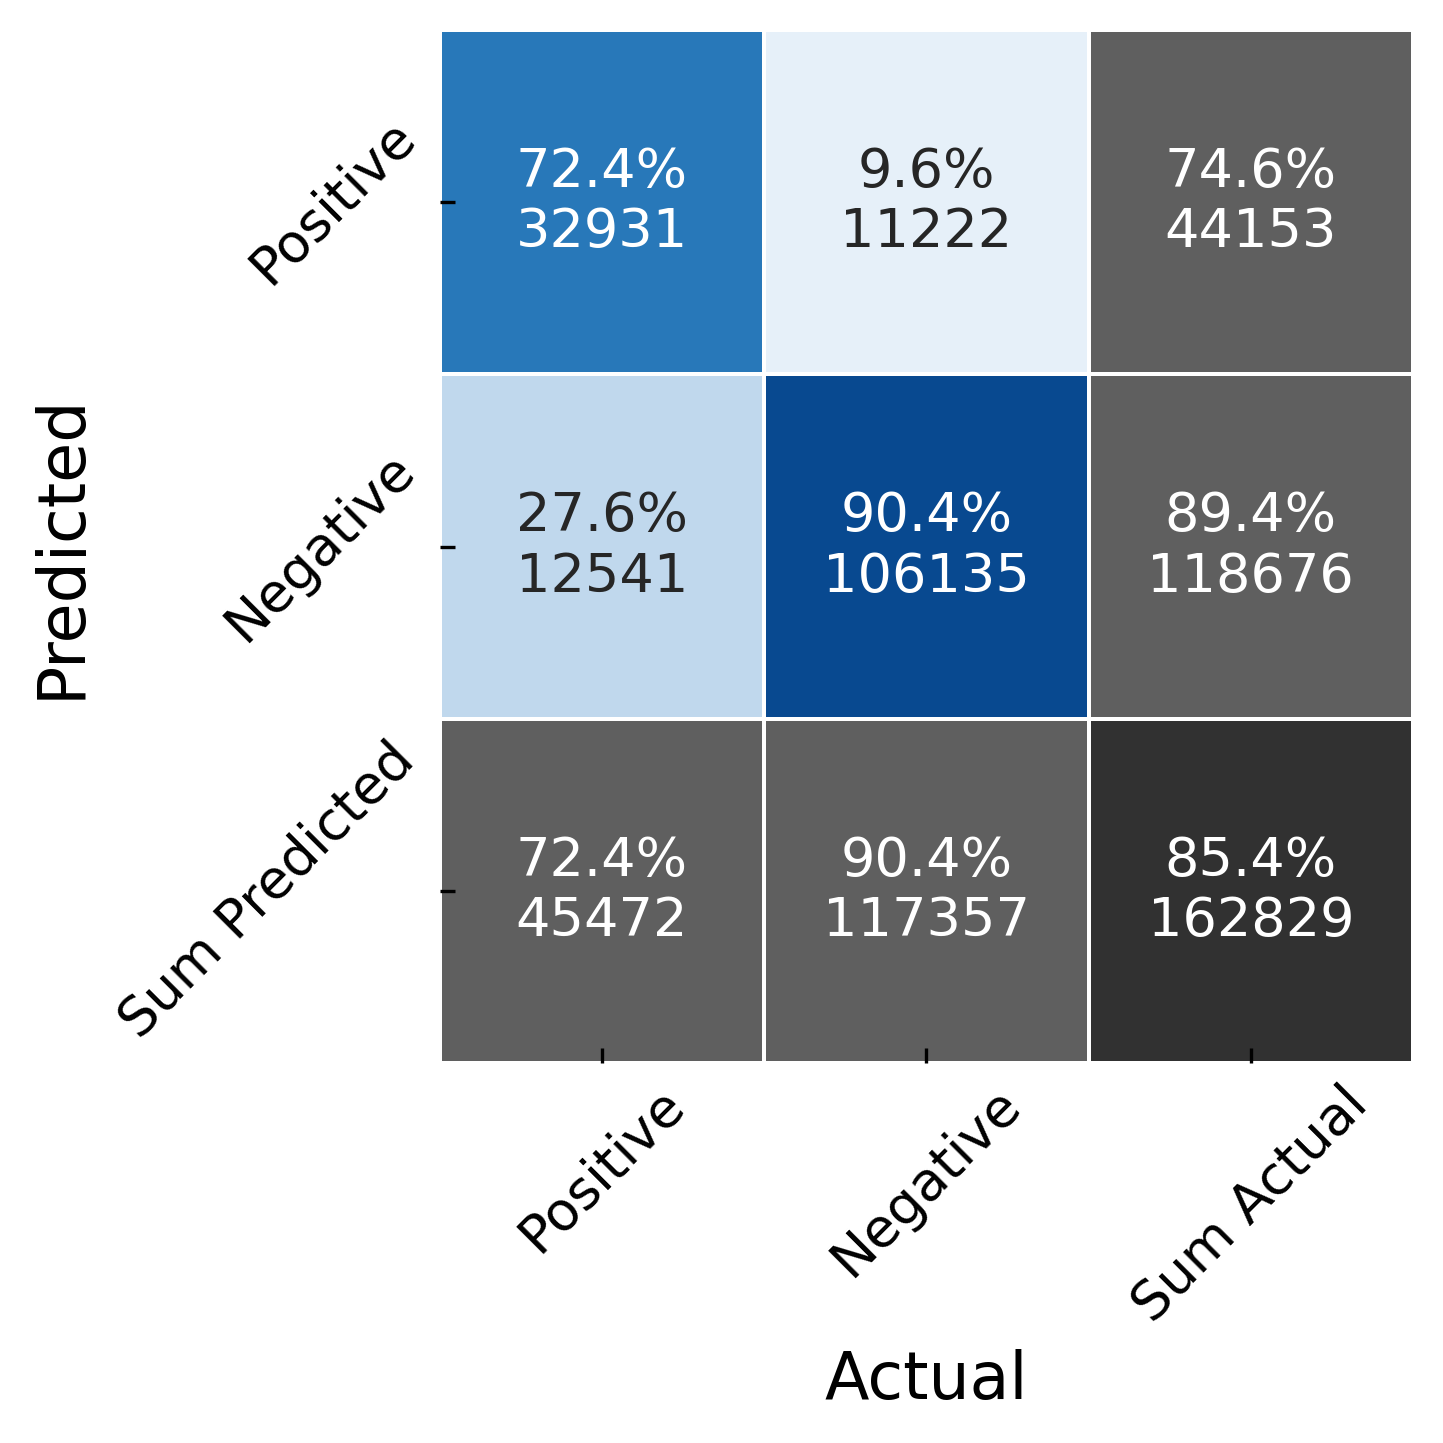

In [11]:
F1_best = 0
F1beta_best = 0
MCC_best = 0
TP_high = 0
acc_best = 0
TP_best = 0
F1_best = 0 
FP_best = 0
TN_best = 0
FN_best = 0
acc_bestF1 = 0
F1beta_best = 0
TP_best_beta = 0
FP_best_beta = 0
TN_best_beta = 0
acc_best_beta = 0
FN_best_beta = 0
MCC_best = 0
TP_best_MCC = 0
FP_best_MCC = 0
TN_best_MCC = 0
FN_best_MCC = 0
acc_best_MCC = 0
acc_best = 0
TP_best_acc = 0
TN_best_acc = 0
FP_best_acc = 0
FN_best_acc = 0
all_scores_merra = []

folder = f"/uio/kant/geo-geofag-u1/fslippe/data/models/merra/scores/"
for file in os.listdir(folder):
    # if band == "band29":
    if "res64" in file:# and "3.75" in file:
        labels = (file.split("labels_")[-1].split(".")[0])
        score_file = np.load(folder + file, allow_pickle=True).item()
        
        points = np.sum(score_file["tot_points"])
        print(points)
        TP = np.sum(score_file["area_true_positive_scores"]) #/ points
        FP = np.sum(score_file["area_false_positive_scores"]) #/ points
        TN = np.sum(score_file["area_true_negative_scores"]) #/ points
        FN = np.sum(score_file["area_false_negative_scores"]) #/ points
        TP_frac = TP / points
        FP_frac = FP / points
        TN_frac = TN / points
        FN_frac = FN / points
        precission = TP / (TP + FP)
        acc = TP + TN
        TPR = TP_frac / (TP_frac + FN_frac)
        FNR =  FN_frac / (FN_frac + TP_frac)
        TNR =  TN_frac / (TN_frac + FP_frac)
        FPR =  FP_frac / (FP_frac + TN_frac)
        MCC = (TP_frac * TN_frac - FP_frac * FN_frac) / np.sqrt((TP_frac + FP_frac) * (TP_frac + FN_frac) * (TN_frac + FP_frac) * (TN_frac + FN_frac))

        F1 =   2 * (TPR * precission) / (precission + TPR)
        F1beta = (1 + beta*beta) * (TPR * precission) / (precission*beta**2 + TPR)

        if TP > TP_high:
            TP_high = TP
            TN_high = TN
            FP_high = FP
            FN_high = FN
            acc_high = acc

        if F1 > F1_best:
            F1_best = F1
            best_model_F1 = file#float(file.split("_Mthr")[1].split("_")[0])
            TP_best = TP 
            FP_best = FP 
            TN_best = TN 
            FN_best = FN 
            acc_bestF1 = acc

        if F1beta > F1beta_best:
            F1beta_best = F1beta
            best_model_F1beta = file#float(file.split("_Mthr")[1].split("_")[0])
            TP_best_beta = TP 
            FP_best_beta = FP 
            TN_best_beta = TN 
            FN_best_beta = FN 
            acc_best_beta = acc

        if MCC > MCC_best:
            MCC_best = MCC
            best_model_MCC = file#float(file.split("_Mthr")[1].split("_")[0])
            TP_best_MCC = TP 
            FP_best_MCC = FP 
            TN_best_MCC = TN 
            FN_best_MCC = FN 
            acc_best_MCC = acc
        
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        all_scores_merra.append({
            'file': float(file.split("_Mthr")[1].split("_")[0]),
            'TP': TP,
            'FP': FP,
            'TN': TN,
            'FN': FN,
            "precision": precision,
            "recall": recall,
            'acc': acc,
            'F1': F1,
            'F1beta': F1beta,
            'MCC': MCC
        }) 



# Define a function to plot a confusion matrix
def plot_confusion_matrix(TP, FP, TN, FN, fig_text):
    # Create confusion matrix
    precision = TP / (TP + FP) * 100
    recall = TP / (TP + FN) * 100
    recall_neg = TN / (TN + FP) * 100
    ACC = (TP + TN) / (TP + TN + FP + FN) * 100
    NPV = TN / (TN + FN) * 100
    FOR = 100 - NPV
    FDR = 100 - precision

    confusion_matrix = np.array([[precision, FOR, 0],
                                   [FDR, NPV, 0],
                                    [0, 0, 0.5]])

    labels = np.array([[f"{confusion_matrix[0,0]:.1f}%\n{TP}", f"{confusion_matrix[0,1]:.1f}%\n{FN}", f"{recall:.1f}%\n{TP+FN}"],
                       [f"{confusion_matrix[1,0]:.1f}%\n{FP}",         f"{confusion_matrix[1,1]:.1f}%\n{TN}", f"{recall_neg:.1f}%\n{FP+TN}"],
                       [f"{precision:.1f}%\n{TP+FP}", f"{NPV:.1f}%\n{FN + TN}", f"{ACC:.1f}%\n{TP+FP+ TN+FN}"]])
    
    
    confusion_matrix_2 = np.array([[TP*100 /  (TP + FN), FP*100 / (TN + FP), 0],
                                   [FN*100 / (TP + FN), TN*100 / (TN + FP), 0],
                                    [0, 0, 0.5]])
    
    labels_2 = np.array([[f"{confusion_matrix_2[0,0]:.1f}%\n{TP}", f"{confusion_matrix_2[0,1]:.1f}%\n{FP}", f"{precision:.1f}%\n{TP+FP}"],
                        [f"{confusion_matrix_2[1,0]:.1f}%\n{FN}",         f"{confusion_matrix_2[1,1]:.1f}%\n{TN}", f"{NPV:.1f}%\n{TN+FN}"],
                        [f"{recall:.1f}%\n{TP+FN}", f"{recall_neg:.1f}%\n{FP + TN}", f"{ACC:.1f}%\n{TP+FP+ TN+FN}"]])
        

    
    # Remove grid from plot:

    # Create a heatmap
    base_colormap = sns.color_palette("Blues", as_cmap=True)
    from matplotlib.colors import LinearSegmentedColormap
    custom_colormap = LinearSegmentedColormap.from_list(
        "CustomBlues", ["#5f5f5f", "#2f2f2f"] + list(base_colormap(np.linspace(0, 1, 256)))
    )
    plt.rcParams.update({'font.size': 13})
    plt.figure(figsize=[5,5], dpi=300)
    plt.grid(False)
    # plt.axis("equal")
    sns.heatmap(confusion_matrix_2, annot=labels_2, fmt='', cmap=custom_colormap,
                xticklabels=['Positive', 'Negative', "Sum Actual"],
                yticklabels=['Positive', 'Negative', "Sum Predicted"], cbar=False, linewidth=.5, vmax=100, vmin=0)
    plt.xticks(rotation=45)  # Rotate x-axis labels 45 degrees
    plt.yticks(rotation=45)  # Rotate y-axis labels 45 degrees
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.tight_layout()
    plt.text(-1, 0, fig_text, fontsize=40)
    plt.show()

plot_confusion_matrix(TP_best_MCC, FP_best_MCC, TN_best_MCC, FN_best_MCC, "")
plot_confusion_matrix(TP_caonet, FP_caonet, TN_caonet, FN_caonet, "")


In [14]:
all_scores_merra_sorted = sorted(all_scores_merra, key=lambda x: float(x['file']))

In [15]:
import matplotlib.pyplot as plt

# Access the default color cycle
default_color_cycle = plt.rcParams['axes.prop_cycle']

# Extract colors as a list
colors = [color['color'] for color in default_color_cycle]

# Print the colors
print(colors)


['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']


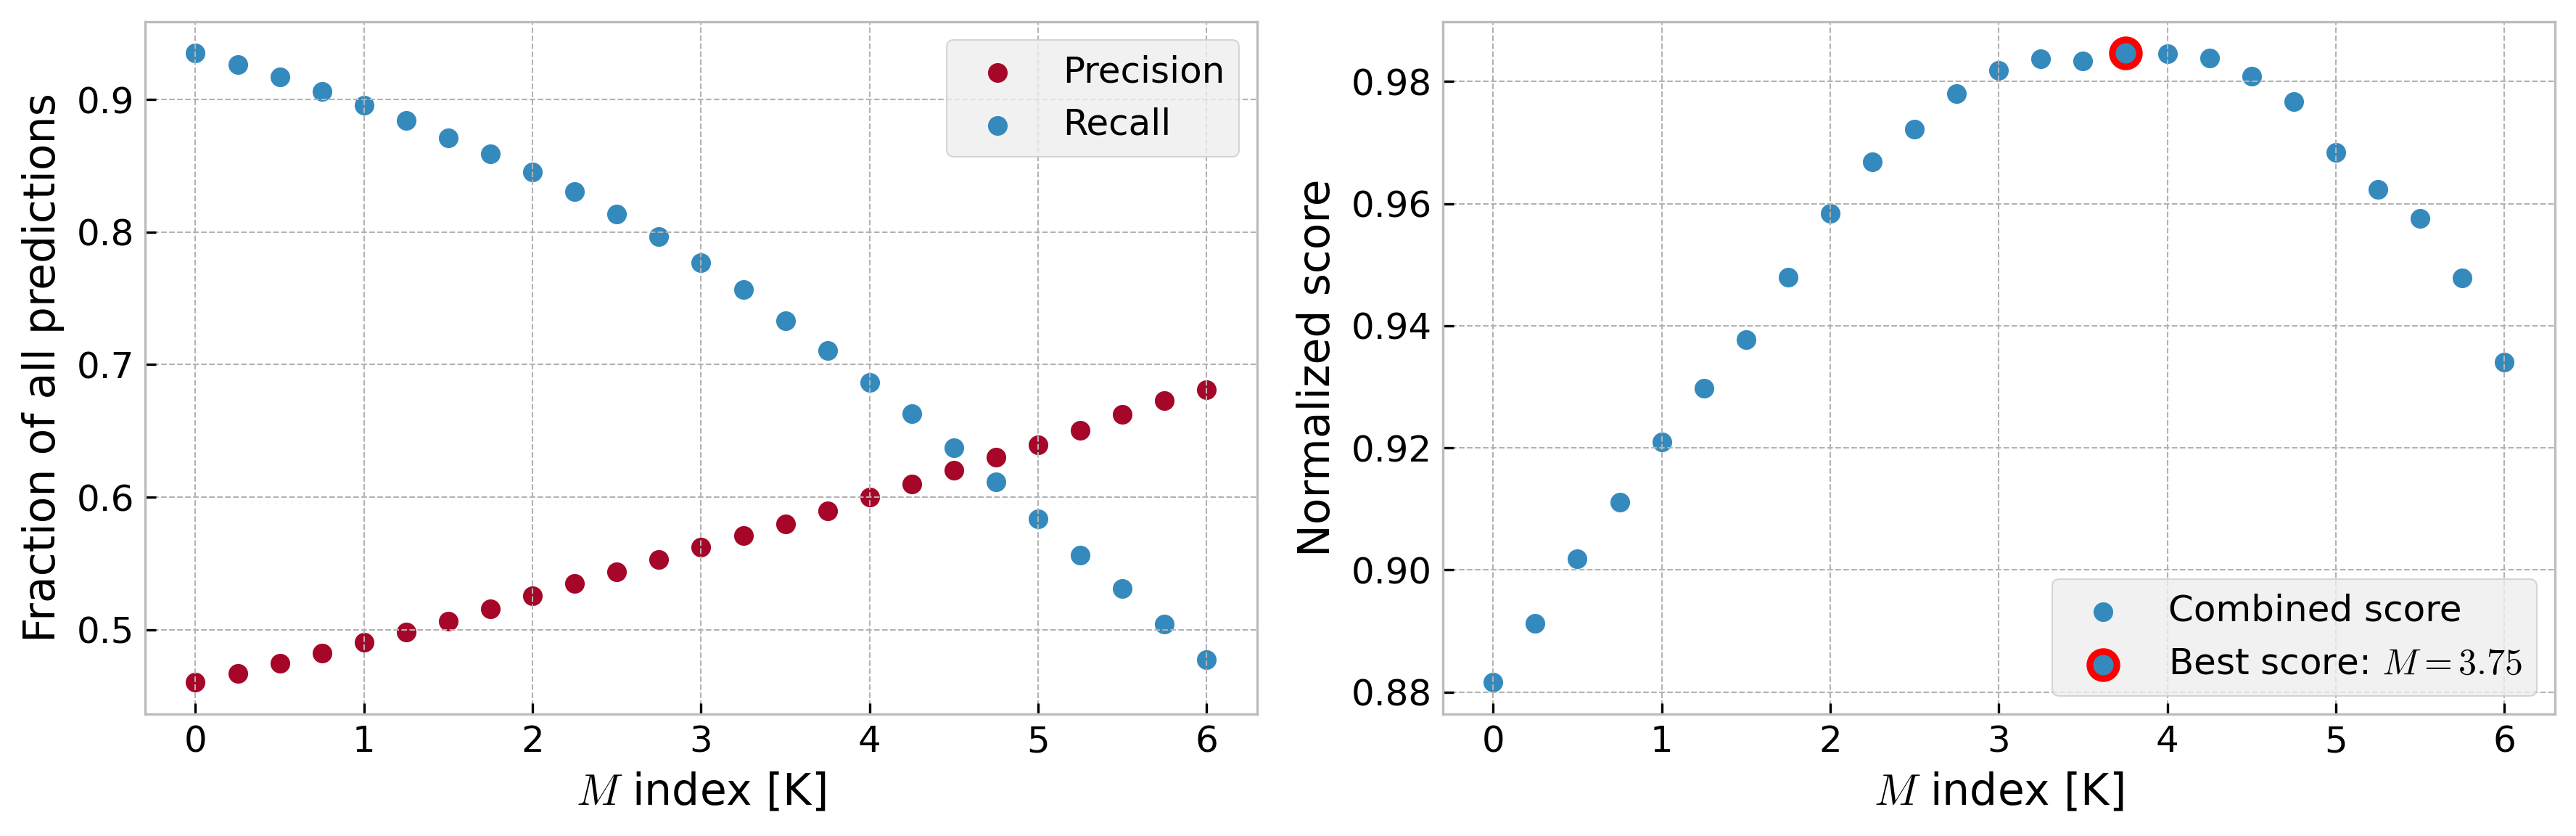

In [18]:
MCC_arr =  np.array([f["MCC"] for f in all_scores_merra_sorted])
MCC_arr = MCC_arr / np.max(MCC_arr)

F1_arr =  np.array([f["F1beta"] for f in all_scores_merra_sorted])
F1_arr = F1_arr / np.max(F1_arr)

plt.rcParams.update({'font.size': 12})

tot_arr = (F1_arr + MCC_arr) / 2 

fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

# First subplot
axs[0].scatter([float(f["file"]) for f in all_scores_merra_sorted], [f["precision"] for f in all_scores_merra_sorted], label="Precision", color="#A60628")
axs[0].scatter([float(f["file"]) for f in all_scores_merra_sorted], [f["recall"] for f in all_scores_merra_sorted], label="Recall", color="#348ABD")
# axs[0].scatter([float(f["file"]) for f in all_scores_merra_sorted], [f["FN"] for f in all_scores_merra_sorted], label="False Positive", color="tab:orange")

axs[0].set_ylabel("Fraction of all predictions")
axs[0].set_xlabel(r"$M$ index [K]")
axs[0].legend()
axs[0].set_facecolor("white")

# Second subplot
axs[1].scatter([float(f["file"]) for f in all_scores_merra_sorted], tot_arr, label="Combined score", color="#348ABD")
axs[1].scatter([float(f["file"]) for f in all_scores_merra_sorted][np.argmax(tot_arr)], np.max(tot_arr), s=80, edgecolors="red", facecolors="#348ABD", lw=2.2, label=r"Best score: $M=3.75$")
axs[1].set_ylabel("Normalized score")
axs[1].set_xlabel(r"$M$ index [K]")
axs[1].set_facecolor("white")
axs[1].legend()

plt.tight_layout()
plt.show()
